In [33]:
import numpy as np
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [25]:
#path = "../../../Google Drive/Data_science/NYU/Machine Learning/ML Project (Collisions)/" #Joe
path = "../../../../Google Drive/ML Project (Collisions)/" # Joyce
# path = "" # Lucas

In [26]:
with open(path+"collisions.pkl", 'rb') as infile:
    df = pickle.load(infile)

In [27]:
df = df.drop(['injured', 'killed'], axis=1)

In [28]:
df.date_time = pd.to_numeric(df.date_time)
df.rise_time = pd.to_numeric(df.rise_time)
df.set_time = pd.to_numeric(df.set_time)

In [62]:
rf = RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_split=10, min_samples_leaf=10)

In [30]:
most_common_zip = df.zip_code.mode()[0]
df.zip_code.fillna(most_common_zip, inplace=True)

In [34]:
X = df.drop(['injured_or_killed'], axis=1)
y = df.injured_or_killed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [63]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [69]:
np.sum(y) / len(y)

0.18892541010693178

In [64]:
rf.score(X_test, y_test)

0.8460543990313365

In [68]:
np.sum(rf.predict(X_test))

13840

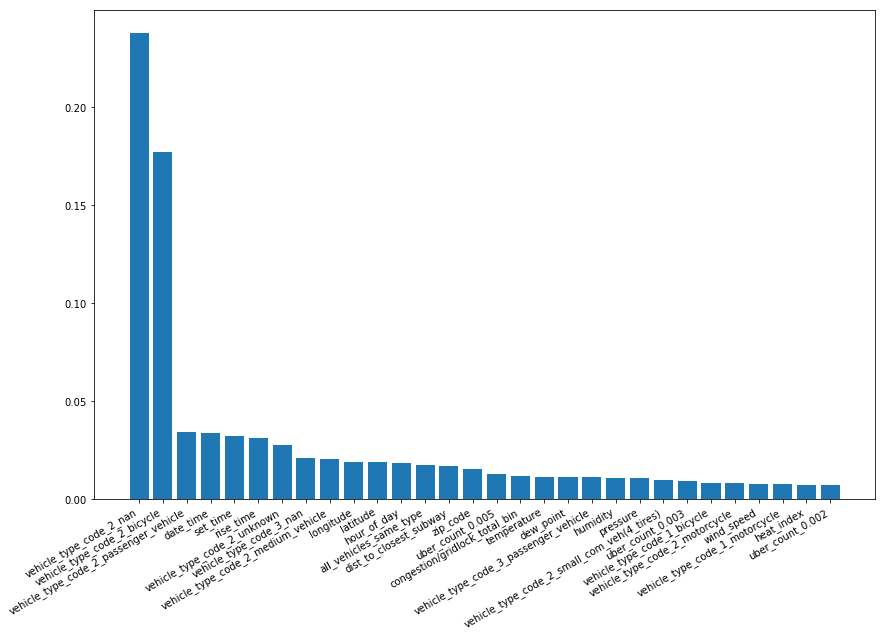

In [65]:
fig = plt.figure(figsize=(14, 10))

num_features = 30

y_pos = np.arange(num_features)
importances = np.vstack((rf.feature_importances_, X_train.columns.values)).T
topX = importances[importances[:,0].argsort()][::-1][:num_features]

plt.bar(y_pos, topX[:, 0])
plt.xticks(y_pos, topX[:, 1])
fig.autofmt_xdate()